In [1]:
%pylab inline
from __future__ import division
import scipy as sp
from scipy import stats
from scipy.signal import argrelextrema
from scipy.interpolate import interp1d
import operator as op
from decimal import *
# import pickle
from mpl_toolkits.mplot3d import Axes3D
import mpld3
# mpld3.enable_notebook()

Populating the interactive namespace from numpy and matplotlib


In [2]:
%run ../cow.py
%run ../optimize_pkg_2.py

In [3]:
filepath_down = "../data_tables/hs_rs_downlink/n"
filepath_up = "../data_tables/hs_rs_uplink/n"

## First Test: N = 10

In [84]:
%%time
# set tSNR, see shape of rSNRdu vs rSNR3
downbit = upbit = xorbit = 4*10**4/3
downTable = load_table(filepath_down+str(N)+extension)
downfunc = interp1d(downTable[0], downTable[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))
upTable = load_table(filepath_up+str(N)+extension)
upfunc = interp1d(upTable[0], upTable[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))

xor_table = load_table(filepath_up+str(N)+extension)
xor_func = interp1d(xor_table[0], xor_table[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))

N = 10
tSNR = 15
rSNR3_range = np.arange(2.0, 3.0, 0.1)
rSNRdu_range = np.arange(2.0, 3.0, 0.01)
X, Y = np.meshgrid(rSNR3_range, rSNRdu_range)
Z = zeros((len(rSNR3_range), len(rSNRdu_range)))
for rSNR3 in rSNR3_range:
    p_add_3 = xor_func(rSNR3)
    for rSNRdu in rSNRdu_range:
        xor_opt = xor_analysis_new(N, tSNR, rSNRdu, rSNR3, downfunc(rSNRdu), upfunc(rSNRdu), xor_func(rSNR3))
        Z[np.where(rSNR3_range==rSNR3)[0][0], np.where(rSNRdu_range==rSNRdu)[0][0]] = 1 - xor_opt

CPU times: user 1h 33min, sys: 41 s, total: 1h 33min 41s
Wall time: 1h 40min 50s


In [89]:
# print rSNR3_range
# print type(rSNR3_range)
print shape(X.T), shape(Y.T), shape(Z)
# print Z
# print '\n'
print np.amin(Z), np.amax(Z)

(10, 100) (10, 100) (10, 100)
7.72447439346e-10 3.76127238244e-08


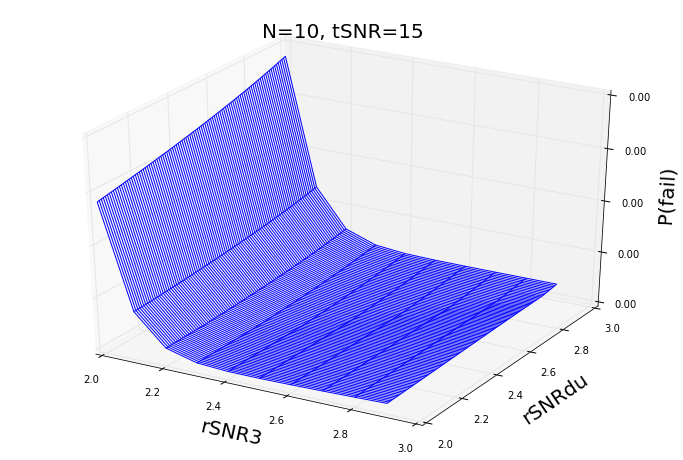

In [92]:
fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection='3d') 
# ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(X, Y, Z.T)

# print X, Y

# surf = ax.plot_surface(Y, X, Z, cmap=cm.coolwarm, linewidth=1, antialiased=True)
# fig.set_clim(vmin=0, vmax=15)
# ax.set_zlim(10**(-9), 2*10**(-8))
# ax.set_xlim(2.8, 3.2)
# ax.set_ylim(1.8, 2.2)
ax.set_xlabel('rSNR3', fontsize=20)
ax.set_ylabel('rSNRdu', fontsize=20)
ax.set_zlabel('P(fail)', fontsize=20)
ax.set_title('N={0}, tSNR={1}'.format(N, tSNR), fontsize=20)

ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# should have done tSNR=15 instead of 14

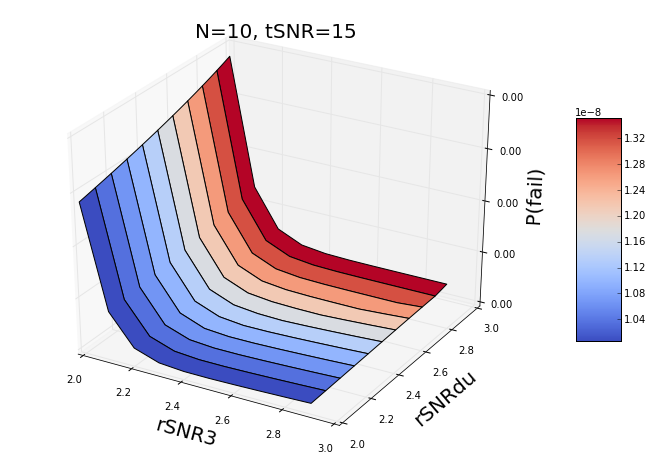

In [95]:
fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection='3d') 
# ax = fig.add_subplot(111, projection='3d')

# ax.plot_wireframe(X, Y, Z.T)

# print X, Y

surf = ax.plot_surface(X, Y, Z.T, cmap=cm.coolwarm, linewidth=1, antialiased=True)
# fig.set_clim(vmin=10**(-9), vmax=2*10**(-8))
# ax.set_zlim(10**(-9), 2*10**(-8))
# ax.set_xlim(2.8, 3.2)
# ax.set_ylim(1.8, 2.2)
ax.set_xlabel('rSNR3', fontsize=20)
ax.set_ylabel('rSNRdu', fontsize=20)
ax.set_zlabel('P(fail)', fontsize=20)
ax.set_title('N={0}, tSNR={1}'.format(N, tSNR), fontsize=20)

ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# should have done tSNR=15 instead of 14

In [145]:
%%time
# set tSNR, see shape of rSNRdu vs rSNR3
N = 10

downbit = upbit = xorbit = 4*10**4/3
downTable = load_table(filepath_down+str(N)+extension)
downfunc = interp1d(downTable[0], downTable[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))
upTable = load_table(filepath_up+str(N)+extension)
upfunc = interp1d(upTable[0], upTable[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))

xor_table = load_table(filepath_up+str(N)+extension)
xor_func = interp1d(xor_table[0], xor_table[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))

tSNR = 15
rSNR3_range = np.arange(2.0, 3.0, 0.1)
# rSNRdu_range = np.arange(2.0, 3.0, 0.1)
# testx, testy = np.meshgrid(rSNR3_range, rSNRdu_range)

rSNRdu_matrix = []
for v in rSNR3_range:
    rSNRdu_matrix.append(np.arange(v-0.9, v+0.1, 0.1))
rSNRdu_matrix = np.matrix(rSNRdu_matrix)

xn, yn = rSNRdu_matrix.shape

rSNR3_matrix = np.vstack((rSNR3_range, rSNR3_range))
for _ in range(yn-2):
    rSNR3_matrix = np.vstack((rSNR3_matrix, rSNR3_range))
rSNR3_matrix = rSNR3_matrix.T

print shape(rSNR3_matrix), shape(rSNRdu_matrix)

result = zeros(shape(rSNR3_matrix))
# Z = zeros((len(rSNR3_range), len(rSNRdu_range)))
for xk in range(xn):
    rSNR3 = rSNR3_range[xk]
# for rSNR3 in rSNR3_range:
    p_add_3 = xor_func(rSNR3)
    for yk in range(yn):
        rSNRdu = rSNRdu_matrix[xk, yk]
#     for rSNRdu in rSNRdu_range:
        xor_opt = xor_analysis_new(N, tSNR, rSNRdu, rSNR3, downfunc(rSNRdu), upfunc(rSNRdu), xor_func(rSNR3))
        result[xk, yk] = 1 - xor_opt
#         Z[np.where(rSNR3_range==rSNR3)[0][0], np.where(rSNRdu_range==rSNRdu)[0][0]] = 1 - xor_opt

(10, 10) (10, 10)
CPU times: user 16min 37s, sys: 8.42 s, total: 16min 46s
Wall time: 18min 45s


In [146]:
print rSNR3_matrix
print '\n'
print rSNRdu_matrix
print '\n'
print result

print '\n'
print result[:,-1]
print '\n'
print result[-1, :]

[[ 2.   2.   2.   2.   2.   2.   2.   2.   2.   2. ]
 [ 2.1  2.1  2.1  2.1  2.1  2.1  2.1  2.1  2.1  2.1]
 [ 2.2  2.2  2.2  2.2  2.2  2.2  2.2  2.2  2.2  2.2]
 [ 2.3  2.3  2.3  2.3  2.3  2.3  2.3  2.3  2.3  2.3]
 [ 2.4  2.4  2.4  2.4  2.4  2.4  2.4  2.4  2.4  2.4]
 [ 2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5]
 [ 2.6  2.6  2.6  2.6  2.6  2.6  2.6  2.6  2.6  2.6]
 [ 2.7  2.7  2.7  2.7  2.7  2.7  2.7  2.7  2.7  2.7]
 [ 2.8  2.8  2.8  2.8  2.8  2.8  2.8  2.8  2.8  2.8]
 [ 2.9  2.9  2.9  2.9  2.9  2.9  2.9  2.9  2.9  2.9]]


[[ 1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2. ]
 [ 1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1]
 [ 1.3  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2]
 [ 1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3]
 [ 1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4]
 [ 1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5]
 [ 1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6]
 [ 1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7]
 [ 1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  

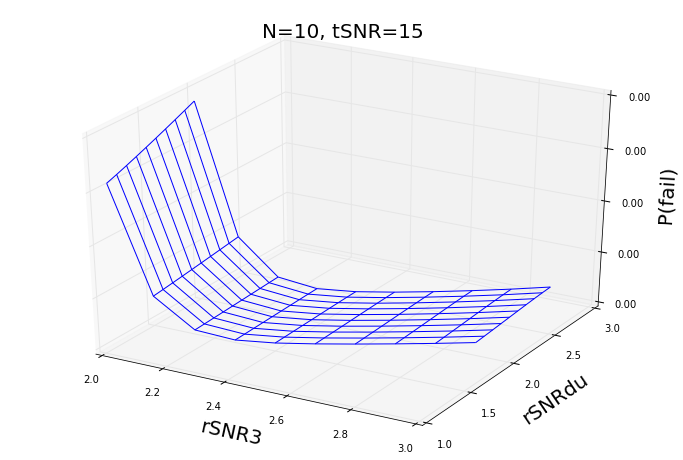

In [147]:
fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection='3d') 
# ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(rSNR3_matrix, rSNRdu_matrix, result)

# print X, Y

# surf = ax.plot_surface(Y, X, Z, cmap=cm.coolwarm, linewidth=1, antialiased=True)
# fig.set_clim(vmin=0, vmax=15)
# ax.set_zlim(10**(-9), 2*10**(-8))
# ax.set_xlim(2.8, 3.2)
# ax.set_ylim(1.8, 2.2)
ax.set_xlabel('rSNR3', fontsize=20)
ax.set_ylabel('rSNRdu', fontsize=20)
ax.set_zlabel('P(fail)', fontsize=20)
ax.set_title('N={0}, tSNR={1}'.format(N, tSNR), fontsize=20)

ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# should have done tSNR=15 instead of 14

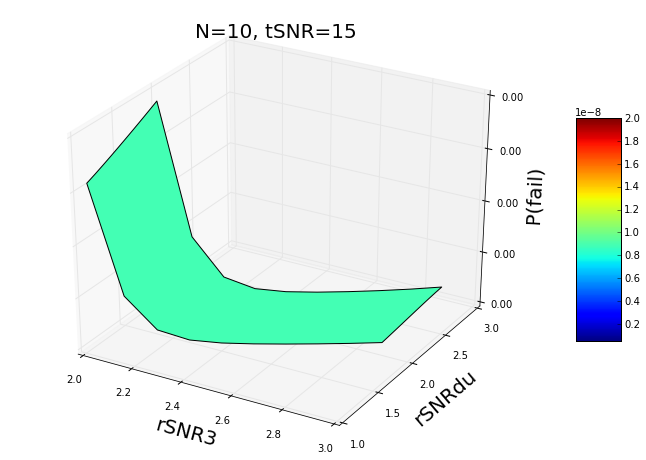

In [154]:
from matplotlib import cm
fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection='3d') 
# ax = fig.add_subplot(111, projection='3d')

# ax.plot_wireframe(X, Y, Z.T)

# print X, Y

surf = ax.plot_surface(rSNR3_matrix, rSNRdu_matrix, result, cmap=cm.jet, linewidth=1, antialiased=True)
surf.set_clim(vmin=5*10**(-10), vmax=2*10**(-8))
# ax.set_zlim(10**(-9), 2*10**(-8))
# ax.set_xlim(2.8, 3.2)
# ax.set_ylim(1.8, 2.2)
ax.set_xlabel('rSNR3', fontsize=20)
ax.set_ylabel('rSNRdu', fontsize=20)
ax.set_zlabel('P(fail)', fontsize=20)
ax.set_title('N={0}, tSNR={1}'.format(N, tSNR), fontsize=20)

ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# should have done tSNR=15 instead of 14

In [127]:
print testx
print '\n'
print testy

print '\n'

print rSNR3_matrix
print '\n'
print rSNRdu_matrix
print testx[0, 2], testy[0,2]

[[ 2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9]
 [ 2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9]
 [ 2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9]
 [ 2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9]
 [ 2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9]
 [ 2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9]
 [ 2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9]
 [ 2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9]
 [ 2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9]
 [ 2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9]]


[[ 2.   2.   2.   2.   2.   2.   2.   2.   2.   2. ]
 [ 2.1  2.1  2.1  2.1  2.1  2.1  2.1  2.1  2.1  2.1]
 [ 2.2  2.2  2.2  2.2  2.2  2.2  2.2  2.2  2.2  2.2]
 [ 2.3  2.3  2.3  2.3  2.3  2.3  2.3  2.3  2.3  2.3]
 [ 2.4  2.4  2.4  2.4  2.4  2.4  2.4  2.4  2.4  2.4]
 [ 2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5]
 [ 2.6  2.6  2.6  2.6  2.6  2.6  2.6  2.6  2.6  2.6]
 [ 2.7  2.7  2.7  2.7  2.7  2.7  2.7  2.7  2.7  2.7]
 [ 2.8  2.8  2.8  2.8  2.8  2.8  2.8  2.8  

## N = 7

In [155]:
%%time
# set tSNR, see shape of rSNRdu vs rSNR3
N = 7

downbit = upbit = xorbit = 4*10**4/3
downTable = load_table(filepath_down+str(N)+extension)
downfunc = interp1d(downTable[0], downTable[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))
upTable = load_table(filepath_up+str(N)+extension)
upfunc = interp1d(upTable[0], upTable[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))

xor_table = load_table(filepath_up+str(N)+extension)
xor_func = interp1d(xor_table[0], xor_table[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))

tSNR = 18.2
rSNR3_range_7 = np.arange(1.0, 2.0, 0.1)
# rSNRdu_range = np.arange(2.0, 3.0, 0.1)
# testx, testy = np.meshgrid(rSNR3_range, rSNRdu_range)

rSNRdu_matrix_7 = []
for v in rSNR3_range_7:
    rSNRdu_matrix_7.append(np.arange(v-0.9, v+0.1, 0.1))
rSNRdu_matrix_7 = np.matrix(rSNRdu_matrix_7)

xn, yn = rSNRdu_matrix_7.shape

rSNR3_matrix_7 = np.vstack((rSNR3_range_7, rSNR3_range_7))
for _ in range(yn-2):
    rSNR3_matrix_7 = np.vstack((rSNR3_matrix_7, rSNR3_range_7))
rSNR3_matrix_7 = rSNR3_matrix_7.T

print shape(rSNR3_matrix_7), shape(rSNRdu_matrix_7)

result_7 = zeros(shape(rSNR3_matrix_7))
# Z = zeros((len(rSNR3_range), len(rSNRdu_range)))
for xk in range(xn):
    rSNR3 = rSNR3_range_7[xk]
# for rSNR3 in rSNR3_range:
    p_add_3 = xor_func(rSNR3)
    for yk in range(yn):
        rSNRdu = rSNRdu_matrix_7[xk, yk]
#     for rSNRdu in rSNRdu_range:
        xor_opt = xor_analysis_new(N, tSNR, rSNRdu, rSNR3, downfunc(rSNRdu), upfunc(rSNRdu), xor_func(rSNR3))
        result_7[xk, yk] = 1 - xor_opt
#         Z[np.where(rSNR3_range==rSNR3)[0][0], np.where(rSNRdu_range==rSNRdu)[0][0]] = 1 - xor_opt

(10, 10) (10, 10)
CPU times: user 4min 28s, sys: 1.92 s, total: 4min 30s
Wall time: 4min 50s


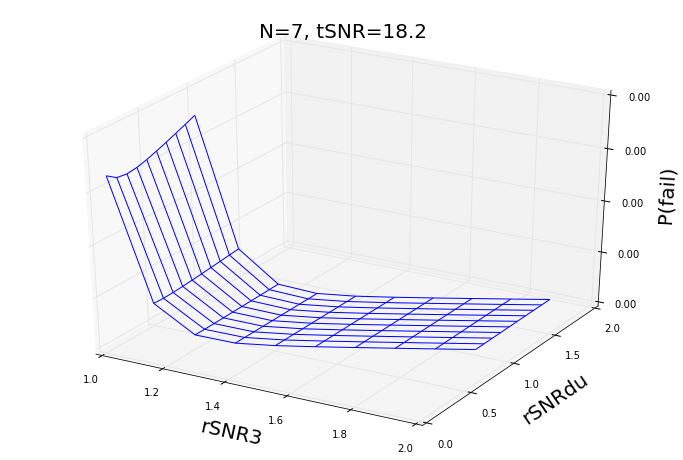

In [156]:
fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection='3d') 
# ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(rSNR3_matrix_7, rSNRdu_matrix_7, result_7)

# print X, Y

# surf = ax.plot_surface(Y, X, Z, cmap=cm.coolwarm, linewidth=1, antialiased=True)
# fig.set_clim(vmin=0, vmax=15)
# ax.set_zlim(10**(-9), 2*10**(-8))
# ax.set_xlim(2.8, 3.2)
# ax.set_ylim(1.8, 2.2)
ax.set_xlabel('rSNR3', fontsize=20)
ax.set_ylabel('rSNRdu', fontsize=20)
ax.set_zlabel('P(fail)', fontsize=20)
ax.set_title('N={0}, tSNR={1}'.format(N, tSNR), fontsize=20)

ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# should have done tSNR=15 instead of 14

In [170]:
%%time
# set tSNR, see shape of rSNRdu vs rSNR3
N = 7

downbit = upbit = xorbit = 4*10**4/3
downTable = load_table(filepath_down+str(N)+extension)
downfunc = interp1d(downTable[0], downTable[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))
upTable = load_table(filepath_up+str(N)+extension)
upfunc = interp1d(upTable[0], upTable[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))

xor_table = load_table(filepath_up+str(N)+extension)
xor_func = interp1d(xor_table[0], xor_table[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))

tSNR = 16.2
rSNR3_range_7 = np.arange(1.0, 2.0, 0.1)
# rSNRdu_range = np.arange(2.0, 3.0, 0.1)
# testx, testy = np.meshgrid(rSNR3_range, rSNRdu_range)

rSNRdu_matrix_7 = []
for v in rSNR3_range_7:
    rSNRdu_matrix_7.append(np.arange(v-0.9, v+0.1, 0.1))
rSNRdu_matrix_7 = np.matrix(rSNRdu_matrix_7)

xn, yn = rSNRdu_matrix_7.shape

rSNR3_matrix_7 = np.vstack((rSNR3_range_7, rSNR3_range_7))
for _ in range(yn-2):
    rSNR3_matrix_7 = np.vstack((rSNR3_matrix_7, rSNR3_range_7))
rSNR3_matrix_7 = rSNR3_matrix_7.T

print shape(rSNR3_matrix_7), shape(rSNRdu_matrix_7)

result_7_1 = zeros(shape(rSNR3_matrix_7))
# Z = zeros((len(rSNR3_range), len(rSNRdu_range)))
for xk in range(xn):
    rSNR3 = rSNR3_range_7[xk]
# for rSNR3 in rSNR3_range:
    p_add_3 = xor_func(rSNR3)
    for yk in range(yn):
        rSNRdu = rSNRdu_matrix_7[xk, yk]
#     for rSNRdu in rSNRdu_range:
        xor_opt = xor_analysis_new(N, tSNR, rSNRdu, rSNR3, downfunc(rSNRdu), upfunc(rSNRdu), xor_func(rSNR3))
        result_7_1[xk, yk] = 1 - xor_opt
#         Z[np.where(rSNR3_range==rSNR3)[0][0], np.where(rSNRdu_range==rSNRdu)[0][0]] = 1 - xor_opt

(10, 10) (10, 10)
CPU times: user 4min 19s, sys: 1.43 s, total: 4min 20s
Wall time: 4min 35s


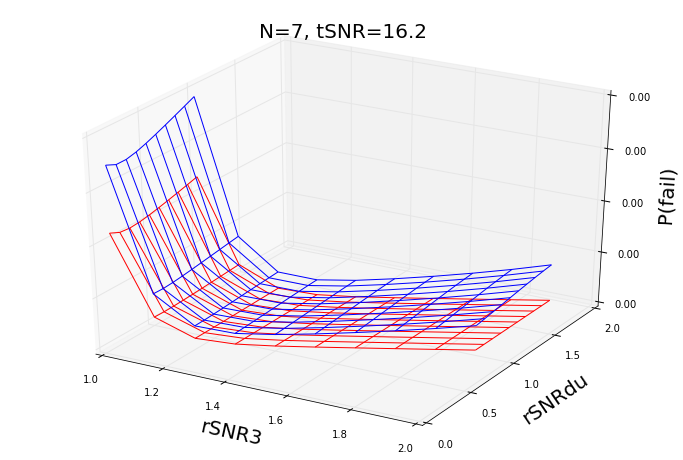

In [172]:
fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection='3d') 
# ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(rSNR3_matrix_7, rSNRdu_matrix_7, result_7_1)
ax.plot_wireframe(rSNR3_matrix_7, rSNRdu_matrix_7, result_7, color=(1,0,0))

# print X, Y

# surf = ax.plot_surface(Y, X, Z, cmap=cm.coolwarm, linewidth=1, antialiased=True)
# fig.set_clim(vmin=0, vmax=15)
# ax.set_zlim(10**(-9), 2*10**(-8))
# ax.set_xlim(2.8, 3.2)
# ax.set_ylim(1.8, 2.2)
ax.set_xlabel('rSNR3', fontsize=20)
ax.set_ylabel('rSNRdu', fontsize=20)
ax.set_zlabel('P(fail)', fontsize=20)
ax.set_title('N={0}, tSNR={1}'.format(N, tSNR), fontsize=20)

ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# should have done tSNR=15 instead of 14

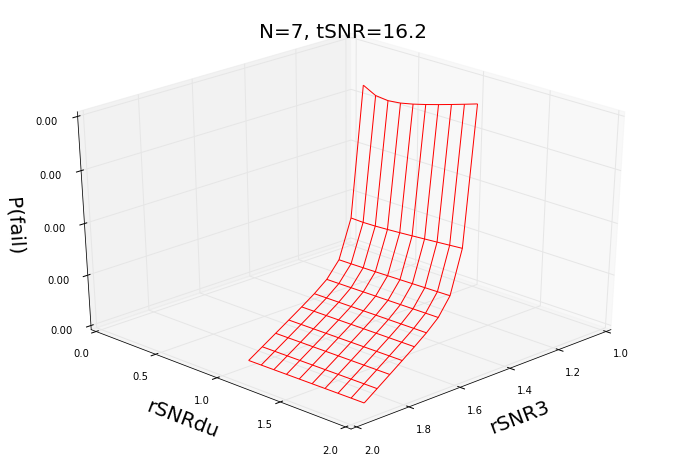

In [180]:
fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection='3d') 
# ax = fig.add_subplot(111, projection='3d')

# ax.plot_wireframe(rSNR3_matrix_7, rSNRdu_matrix_7, result_7_1)
ax.plot_wireframe(rSNR3_matrix_7, rSNRdu_matrix_7, result_7, color=(1,0,0))

# print X, Y

# surf = ax.plot_surface(Y, X, Z, cmap=cm.coolwarm, linewidth=1, antialiased=True)
# fig.set_clim(vmin=0, vmax=15)
# ax.set_zlim(10**(-9), 2*10**(-8))
# ax.set_xlim(2.8, 3.2)
# ax.set_ylim(1.8, 2.2)
ax.set_xlabel('rSNR3', fontsize=20)
ax.set_ylabel('rSNRdu', fontsize=20)
ax.set_zlabel('P(fail)', fontsize=20)
ax.set_title('N={0}, tSNR={1}'.format(N, tSNR), fontsize=20)

ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(elev=30,azim=45)
plt.show()

# should have done tSNR=15 instead of 14

[[ 0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5]]
(10,) (10,)
[  5.83966098e-10   6.13373796e-10   6.44871490e-10   6.77247591e-10
   7.09752257e-10   7.41756434e-10   7.72587772e-10   8.01446465e-10
   8.27353852e-10   8.49105453e-10]


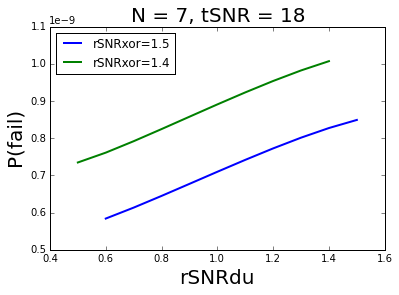

In [207]:
# for fixed tSNR and rSNR

# print rSNR3_matrix_7[5]
print rSNRdu_matrix_7[5]
print shape(np.ravel(rSNRdu_matrix_7[5])), shape(result_7[5])
# print result_7[5,:]
print result_7[5]

plot(np.ravel(rSNRdu_matrix_7[5]), result_7[5],lw=2.0,label='rSNRxor=1.5')
plot(np.ravel(rSNRdu_matrix_7[4]), result_7[4],lw=2.0,label='rSNRxor=1.4')
xlabel('rSNRdu',fontsize=20)
ylabel('P(fail)', fontsize=20)
title('N = 7, tSNR = 18', fontsize=20)
# plot(np.ravel(rSNRdu_matrix_7[5]), result_7_1[5],lw=2.0,label='tSNR=16')
legend(loc=0)

## N = 4

In [162]:
%%time
# set tSNR, see shape of rSNRdu vs rSNR3
N = 4

downbit = upbit = xorbit = 4*10**4/3
downTable = load_table(filepath_down+str(N)+extension)
downfunc = interp1d(downTable[0], downTable[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))
upTable = load_table(filepath_up+str(N)+extension)
upfunc = interp1d(upTable[0], upTable[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))

xor_table = load_table(filepath_up+str(N)+extension)
xor_func = interp1d(xor_table[0], xor_table[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))

tSNR = 26.9
rSNR3_range_4 = np.arange(0.0, 1.0, 0.05)
# rSNRdu_range = np.arange(2.0, 3.0, 0.1)

rSNRdu_matrix_4 = []
for v in rSNR3_range_4:
    rSNRdu_matrix_4.append(np.arange(v-0.9, v+0.1, 0.05))
rSNRdu_matrix_4 = np.matrix(rSNRdu_matrix_4)

xn, yn = rSNRdu_matrix_4.shape

rSNR3_matrix_4 = np.vstack((rSNR3_range_4, rSNR3_range_4))
for _ in range(yn-2):
    rSNR3_matrix_4 = np.vstack((rSNR3_matrix_4, rSNR3_range_4))
rSNR3_matrix_4 = rSNR3_matrix_4.T

print shape(rSNR3_matrix_4), shape(rSNRdu_matrix_4)

result_4 = zeros(shape(rSNR3_matrix_4))
# Z = zeros((len(rSNR3_range), len(rSNRdu_range)))
for xk in range(xn):
    rSNR3 = rSNR3_range_4[xk]
    p_add_3 = xor_func(rSNR3)
    for yk in range(yn):
        rSNRdu = rSNRdu_matrix_4[xk, yk]
        xor_opt = xor_analysis_new(N, tSNR, rSNRdu, rSNR3, downfunc(rSNRdu), upfunc(rSNRdu), xor_func(rSNR3))
        result_4[xk, yk] = 1 - xor_opt

(20, 20) (20, 20)
CPU times: user 3min 11s, sys: 1.15 s, total: 3min 12s
Wall time: 3min 24s


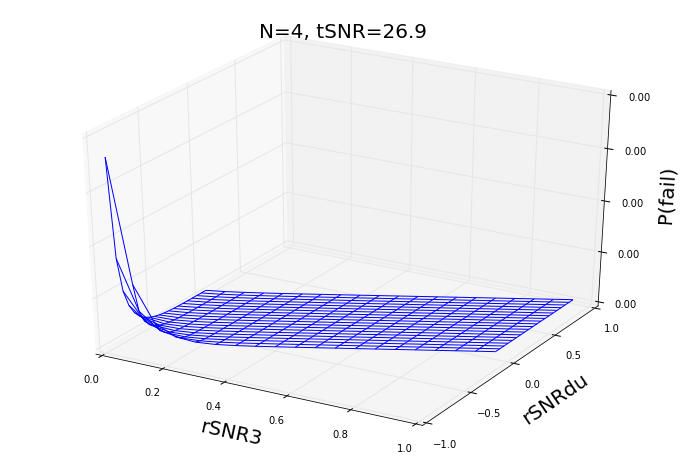

In [163]:
fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection='3d') 
# ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(rSNR3_matrix_4, rSNRdu_matrix_4, result_4)

# print X, Y

# surf = ax.plot_surface(Y, X, Z, cmap=cm.coolwarm, linewidth=1, antialiased=True)
# fig.set_clim(vmin=0, vmax=15)
# ax.set_zlim(10**(-9), 2*10**(-8))
# ax.set_xlim(2.8, 3.2)
# ax.set_ylim(1.8, 2.2)
ax.set_xlabel('rSNR3', fontsize=20)
ax.set_ylabel('rSNRdu', fontsize=20)
ax.set_zlabel('P(fail)', fontsize=20)
ax.set_title('N={0}, tSNR={1}'.format(N, tSNR), fontsize=20)

ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# should have done tSNR=15 instead of 14

In [164]:
np.amin(result_4), np.amax(result_4)

(7.7062112247006098e-10, 5.3316657336877071e-05)

In [165]:
%%time
# set tSNR, see shape of rSNRdu vs rSNR3
N = 4

downbit = upbit = xorbit = 4*10**4/3
downTable = load_table(filepath_down+str(N)+extension)
downfunc = interp1d(downTable[0], downTable[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))
upTable = load_table(filepath_up+str(N)+extension)
upfunc = interp1d(upTable[0], upTable[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))

xor_table = load_table(filepath_up+str(N)+extension)
xor_func = interp1d(xor_table[0], xor_table[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))

tSNR = 24.9
rSNR3_range_4 = np.arange(0.0, 1.0, 0.05)
# rSNRdu_range = np.arange(2.0, 3.0, 0.1)

rSNRdu_matrix_4 = []
for v in rSNR3_range_4:
    rSNRdu_matrix_4.append(np.arange(v-0.9, v+0.1, 0.05))
rSNRdu_matrix_4 = np.matrix(rSNRdu_matrix_4)

xn, yn = rSNRdu_matrix_4.shape

rSNR3_matrix_4 = np.vstack((rSNR3_range_4, rSNR3_range_4))
for _ in range(yn-2):
    rSNR3_matrix_4 = np.vstack((rSNR3_matrix_4, rSNR3_range_4))
rSNR3_matrix_4 = rSNR3_matrix_4.T

print shape(rSNR3_matrix_4), shape(rSNRdu_matrix_4)

result_4_1 = zeros(shape(rSNR3_matrix_4))
# Z = zeros((len(rSNR3_range), len(rSNRdu_range)))
for xk in range(xn):
    rSNR3 = rSNR3_range_4[xk]
    p_add_3 = xor_func(rSNR3)
    for yk in range(yn):
        rSNRdu = rSNRdu_matrix_4[xk, yk]
        xor_opt = xor_analysis_new(N, tSNR, rSNRdu, rSNR3, downfunc(rSNRdu), upfunc(rSNRdu), xor_func(rSNR3))
        result_4_1[xk, yk] = 1 - xor_opt

(20, 20) (20, 20)
CPU times: user 3min 15s, sys: 1.49 s, total: 3min 16s
Wall time: 3min 37s


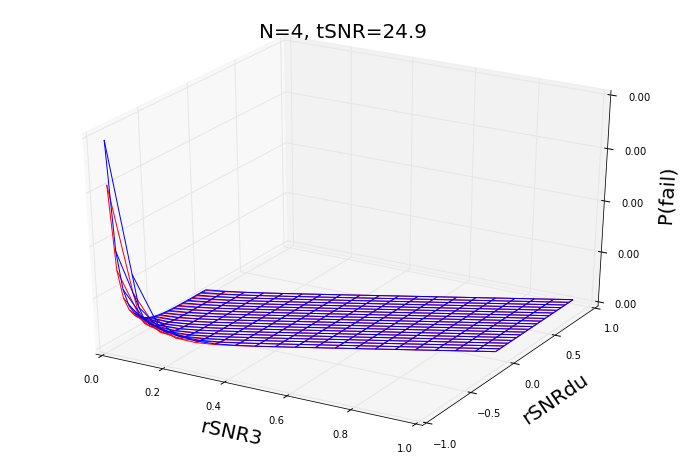

In [169]:
fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection='3d') 
# ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(rSNR3_matrix_4, rSNRdu_matrix_4, result_4_1)
ax.plot_wireframe(rSNR3_matrix_4, rSNRdu_matrix_4, result_4, color=(1,0,0))
# print X, Y

# surf = ax.plot_surface(Y, X, Z, cmap=cm.coolwarm, linewidth=1, antialiased=True)
# fig.set_clim(vmin=0, vmax=15)
# ax.set_zlim(10**(-9), 2*10**(-8))
# ax.set_xlim(2.8, 3.2)
# ax.set_ylim(1.8, 2.2)
ax.set_xlabel('rSNR3', fontsize=20)
ax.set_ylabel('rSNRdu', fontsize=20)
ax.set_zlabel('P(fail)', fontsize=20)
ax.set_title('N={0}, tSNR={1}'.format(N, tSNR), fontsize=20)

ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# should have done tSNR=15 instead of 14

[ 0.75  0.75  0.75  0.75  0.75  0.75  0.75  0.75  0.75  0.75  0.75  0.75
  0.75  0.75  0.75  0.75  0.75  0.75  0.75  0.75]
[[ -6.50000000e-01  -6.00000000e-01  -5.50000000e-01  -5.00000000e-01
   -4.50000000e-01  -4.00000000e-01  -3.50000000e-01  -3.00000000e-01
   -2.50000000e-01  -2.00000000e-01  -1.50000000e-01  -1.00000000e-01
   -5.00000000e-02   5.55111512e-16   5.00000000e-02   1.00000000e-01
    1.50000000e-01   2.00000000e-01   2.50000000e-01   3.00000000e-01]]
0.9 [  9.06134612e-10   9.11398068e-10   9.21226873e-10   9.33454980e-10
   9.46913659e-10   9.60982849e-10   9.75340253e-10   9.89816784e-10
   1.00432185e-09   1.01880171e-09   1.03321940e-09   1.04754538e-09
   1.06175146e-09   1.07580955e-09   1.08969067e-09   1.10336362e-09
   1.11679521e-09   1.12995069e-09   1.14279197e-09   1.19650778e-09]


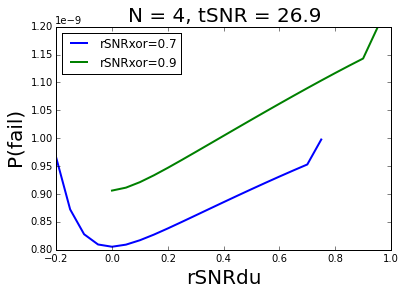

In [245]:
# Reminder to look at 14, 18 then 14, 18, 10
# for fixed tSNR and rSNR3

print rSNR3_matrix_4[15]
print rSNRdu_matrix_4[5]
# print result_7[5,:]
print rSNR3_matrix_4[18,0], result_4[18]

# plot(np.ravel(rSNRdu_matrix_4[15]), result_4[15],lw=2.0,label='rSNRxor=0.75')
plot(np.ravel(rSNRdu_matrix_4[14]), result_4[14],lw=2.0,label='rSNRxor=0.7')
plot(np.ravel(rSNRdu_matrix_4[18]), result_4[18],lw=2.0,label='rSNRxor=0.9')
# plot(np.ravel(rSNRdu_matrix_4[10]), result_4[10],lw=2.0,label='rSNRxor=0.5')
# plot(np.ravel(rSNRdu_matrix_4[5]), result_4[5],lw=2.0,label='rSNRxor=0.25')
xlabel('rSNRdu',fontsize=20)
ylabel('P(fail)', fontsize=20)
title('N = 4, tSNR = 26.9', fontsize=20)
# plot(np.ravel(rSNRdu_matrix_7[5]), result_7_1[5],lw=2.0,label='tSNR=16')
legend(loc=0)

# Another Test N = 7

7.3474382134e-10
1.4 [  7.34743821e-10   7.61169017e-10   7.91902988e-10   8.24512680e-10
   8.57749871e-10   8.90830631e-10   9.23089383e-10   9.53813251e-10
   9.82158133e-10   1.00709463e-09]


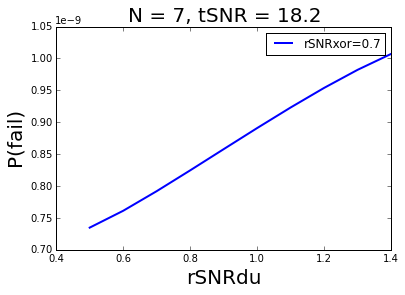

In [233]:
print np.amin(result_7[4])

# for fixed tSNR and rSNR3

print rSNR3_matrix_7[4,0], result_7[4]

mpld3.display(fig)
plot(np.ravel(rSNRdu_matrix_7[4]), result_7[4],lw=2.0,label='rSNRxor=0.7')
xlabel('rSNRdu',fontsize=20)
ylabel('P(fail)', fontsize=20)
title('N = 7, tSNR = 18.2', fontsize=20)
legend(loc=0)

In [16]:
%%time
# set tSNR, see shape of rSNRdu vs rSNR3
N = 7

downbit = upbit = xorbit = 4*10**4/3
downTable = load_table(filepath_down+str(N)+extension)
downfunc = interp1d(downTable[0], downTable[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))
upTable = load_table(filepath_up+str(N)+extension)
upfunc = interp1d(upTable[0], upTable[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))

xor_table = load_table(filepath_up+str(N)+extension)
xor_func = interp1d(xor_table[0], xor_table[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))

tSNR = 18.2
rSNR3_range = [1.3, 1.4, 1.5, 1.6]
rSNRdu_range = np.arange(0, 1.6, 0.1)
# rSNRdu_range = np.arange(0, rSNR3+0.1, 0.1)

xn, yn = len(rSNR3_range), len(rSNRdu_range)

test = zeros((xn, yn))
    
for xk in range(xn):
    rSNR3 = rSNR3_range[xk]
    p_add_3 = xor_func(rSNR3)
    for yk in range(yn):
        rSNRdu = rSNRdu_range[yk]
        xor_opt = xor_analysis_pruned(N, tSNR, rSNRdu, rSNR3, downfunc(rSNRdu), upfunc(rSNRdu), p_add_3)
        test[xk, yk] = 1 - xor_opt
#         Z[np.where(rSNR3_range==rSNR3)[0][0], np.where(rSNRdu_range==rSNRdu)[0][0]] = 1 - xor_opt

CPU times: user 22.5 s, sys: 319 ms, total: 22.8 s
Wall time: 24.2 s


In [17]:
print rSNRdu_range
print test

# label represents rSNR3
fig = figure()
plot(rSNRdu_range, test[0], lw=2.0, label='1.3')
plot(rSNRdu_range, test[1], lw=2.0, label='1.4')
plot(rSNRdu_range, test[2], lw=2.0, label='1.5')
plot(rSNRdu_range, test[3], lw=2.0, label='1.6')
xlabel('rSNRdu', fontsize=20)
ylabel('P(fail', fontsize=20)
title('N=7', fontsize=20)
legend(loc=0)
mpld3.display(fig)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5]
[[  2.43686382e-09   1.93238980e-09   1.75024129e-09   1.69735226e-09
    1.70259196e-09   1.73501702e-09   1.78013004e-09   1.83103144e-09
    1.88456206e-09   1.93907634e-09   1.99375294e-09   2.04776429e-09
    2.10039619e-09   2.15077756e-09   2.28466224e-09   2.43599885e-09]
 [  1.34869271e-09   9.17824039e-10   7.67823138e-10   7.20857929e-10
    7.17761073e-10   7.34794892e-10   7.61252061e-10   7.91962496e-10
    8.24541546e-10   8.57774296e-10   8.90852725e-10   9.23107146e-10
    9.53832013e-10   9.82188220e-10   1.00709485e-09   1.12898990e-09]
 [  1.18632604e-09   7.47539031e-10   5.96104055e-10   5.48060708e-10
    5.43584955e-10   5.59093771e-10   5.84017279e-10   6.13430862e-10
    6.44912235e-10   6.77280454e-10   7.09773462e-10   7.41780637e-10
    7.72621966e-10   8.01457567e-10   8.27362734e-10   8.49110005e-10]
 [  1.23153332e-09   7.65410513e-10   6.04587269e-10   5.53794233e-10
    

In [20]:
print rSNRdu_range[np.where(test[0] == np.amin(test[0]))[0][0]]
print rSNRdu_range[np.where(test[1] == np.amin(test[1]))[0][0]]
print rSNRdu_range[np.where(test[2] == np.amin(test[2]))[0][0]]
print rSNRdu_range[np.where(test[3] == np.amin(test[3]))[0][0]]
print '\n'
print test[0][0], test[1][0], test[2][0], test[3][0]

0.3
0.4
0.4
0.4


2.43686382184e-09 1.34869271307e-09 1.18632603741e-09 1.23153331977e-09


In [22]:
%%time
N = 7
d_rSNR = 0.1

downbit = upbit = xorbit = 4*10**4/3
downTable = load_table(filepath_down+str(N)+extension)
downfunc = interp1d(downTable[0], downTable[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))
upTable = load_table(filepath_up+str(N)+extension)
upfunc = interp1d(upTable[0], upTable[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))

xor_table = load_table(filepath_up+str(N)+extension)
xor_func = interp1d(xor_table[0], xor_table[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))

tSNR = 18.2
rSNRdu_start = 0.0
rSNRdu_test = []
for rSNR3 in [1.3, 1.4, 1.5, 1.6, 1.7]:
    p_add_3 = xor_func(rSNR3)
    for rSNRdu in np.arange(rSNRdu_start, rSNR3+d_rSNR, d_rSNR):
        xor_opt = xor_analysis_pruned(N, tSNR, rSNRdu, rSNR3, downfunc(rSNRdu), upfunc(rSNRdu), xor_func(rSNR3))
        if rSNRdu == rSNRdu_start:
            # if 1 - xor_opt > rSNRdu_test[-1]:
            #     break
            rSNRdu_test.append(1 - xor_opt)
        # xor_opt = xor_analysis_opt(N, tSNR, rSNR1, rSNR2, p_add_3, downfunc(rSNR1), upfunc(rSNR2))
#         if 1-xor_opt <= protocol_target:
#             return (tSNR, rSNRdu, rSNR3, downfunc(rSNRdu), upfunc(rSNRdu), p_add_3)
print rSNRdu_test

[2.4368638218419392e-09, 1.3486927130657023e-09, 1.1863260374056495e-09, 1.2315333197676637e-09, 1.3250223140914841e-09]
CPU times: user 27.1 s, sys: 178 ms, total: 27.3 s
Wall time: 27.8 s


In [25]:
%%time
N = 7
d_rSNR = 0.1

downbit = upbit = xorbit = 4*10**4/3
downTable = load_table(filepath_down+str(N)+extension)
downfunc = interp1d(downTable[0], downTable[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))
upTable = load_table(filepath_up+str(N)+extension)
upfunc = interp1d(upTable[0], upTable[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))

xor_table = load_table(filepath_up+str(N)+extension)
xor_func = interp1d(xor_table[0], xor_table[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))

tSNR = 18.2
rSNRdu_start = 0.0
rSNRdu_test = [float("inf")]
for rSNR3 in [1.3, 1.4, 1.5, 1.6, 1.7]:
    p_add_3 = xor_func(rSNR3)
    for rSNRdu in np.arange(rSNRdu_start, rSNR3+d_rSNR, d_rSNR):
        xor_opt = xor_analysis_pruned(N, tSNR, rSNRdu, rSNR3, downfunc(rSNRdu), upfunc(rSNRdu), xor_func(rSNR3))
        if rSNRdu == rSNRdu_start:
            if 1 - xor_opt > rSNRdu_test[-1]:
                break
            rSNRdu_test.append(1 - xor_opt)
        # xor_opt = xor_analysis_opt(N, tSNR, rSNR1, rSNR2, p_add_3, downfunc(rSNR1), upfunc(rSNR2))
#         if 1-xor_opt <= protocol_target:
#             return (tSNR, rSNRdu, rSNR3, downfunc(rSNRdu), upfunc(rSNRdu), p_add_3)
print rSNRdu_test

[inf, 2.4368638218419392e-09, 1.3486927130657023e-09, 1.1863260374056495e-09]
CPU times: user 16.9 s, sys: 49.7 ms, total: 16.9 s
Wall time: 17.1 s
